In [51]:
from keras.applications import VGG16
from matplotlib import pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
model = VGG16()

In [52]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

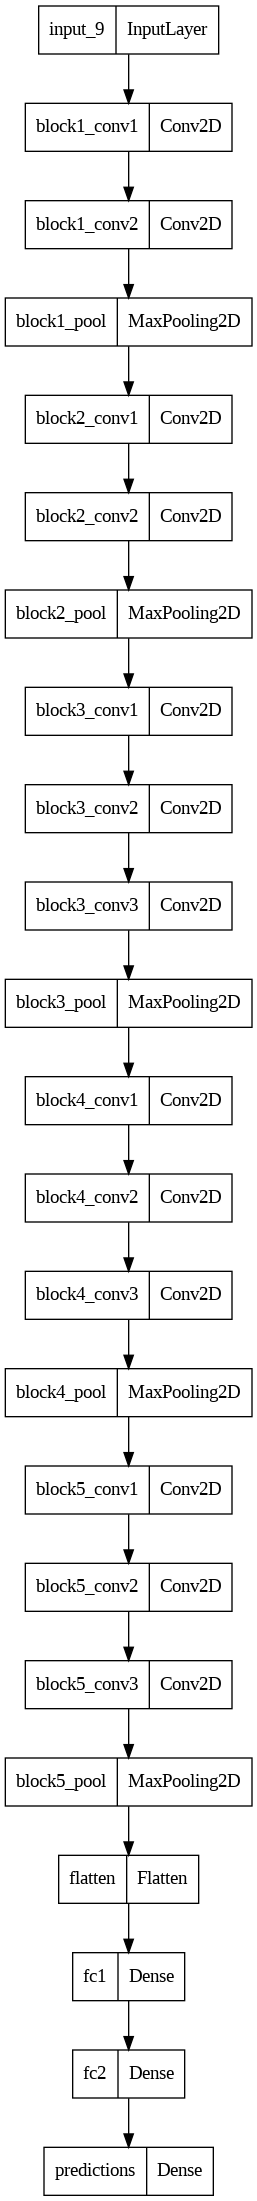

In [53]:
from keras.utils import plot_model
plot_model(model)

In [54]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters, biases = model.layers[i].get_weights()
  print("layer number",i,model.layers[i].name,filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [55]:
filters,biases = model.layers[1].get_weights()

In [56]:
f_min,f_max = filters.min(),filters.max()
filters = (filters - f_min)/(f_max-f_min)

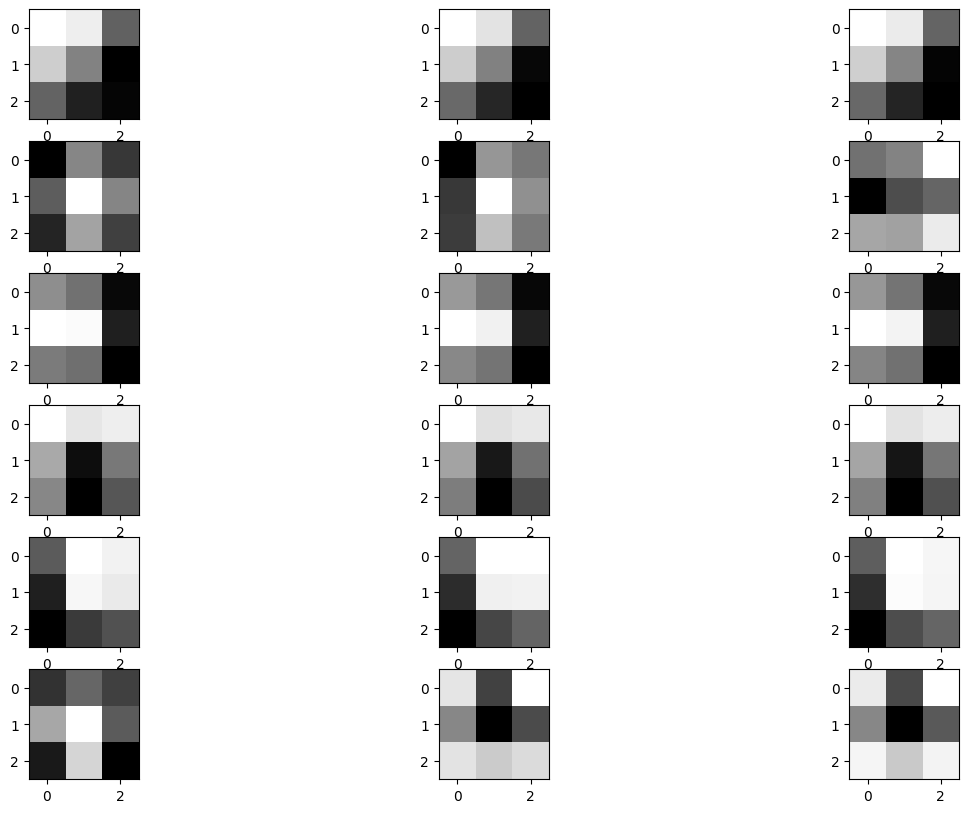

In [57]:
n_filters = 6
ix = 1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
  f = filters[:,:,:,i]
  for j in range(3):
    plt.subplot(n_filters,3,ix)
    plt.imshow(f[:,:,j],cmap='gray')
    ix += 1
plt.show()

In [58]:
model = Model(inputs=model.inputs,outputs=model.layers[1].output)

In [59]:
image = load_img('/content/8.jpg',target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image,axis=0)
image = preprocess_input(image)

1/1 [==============================] - 0s 54ms/step


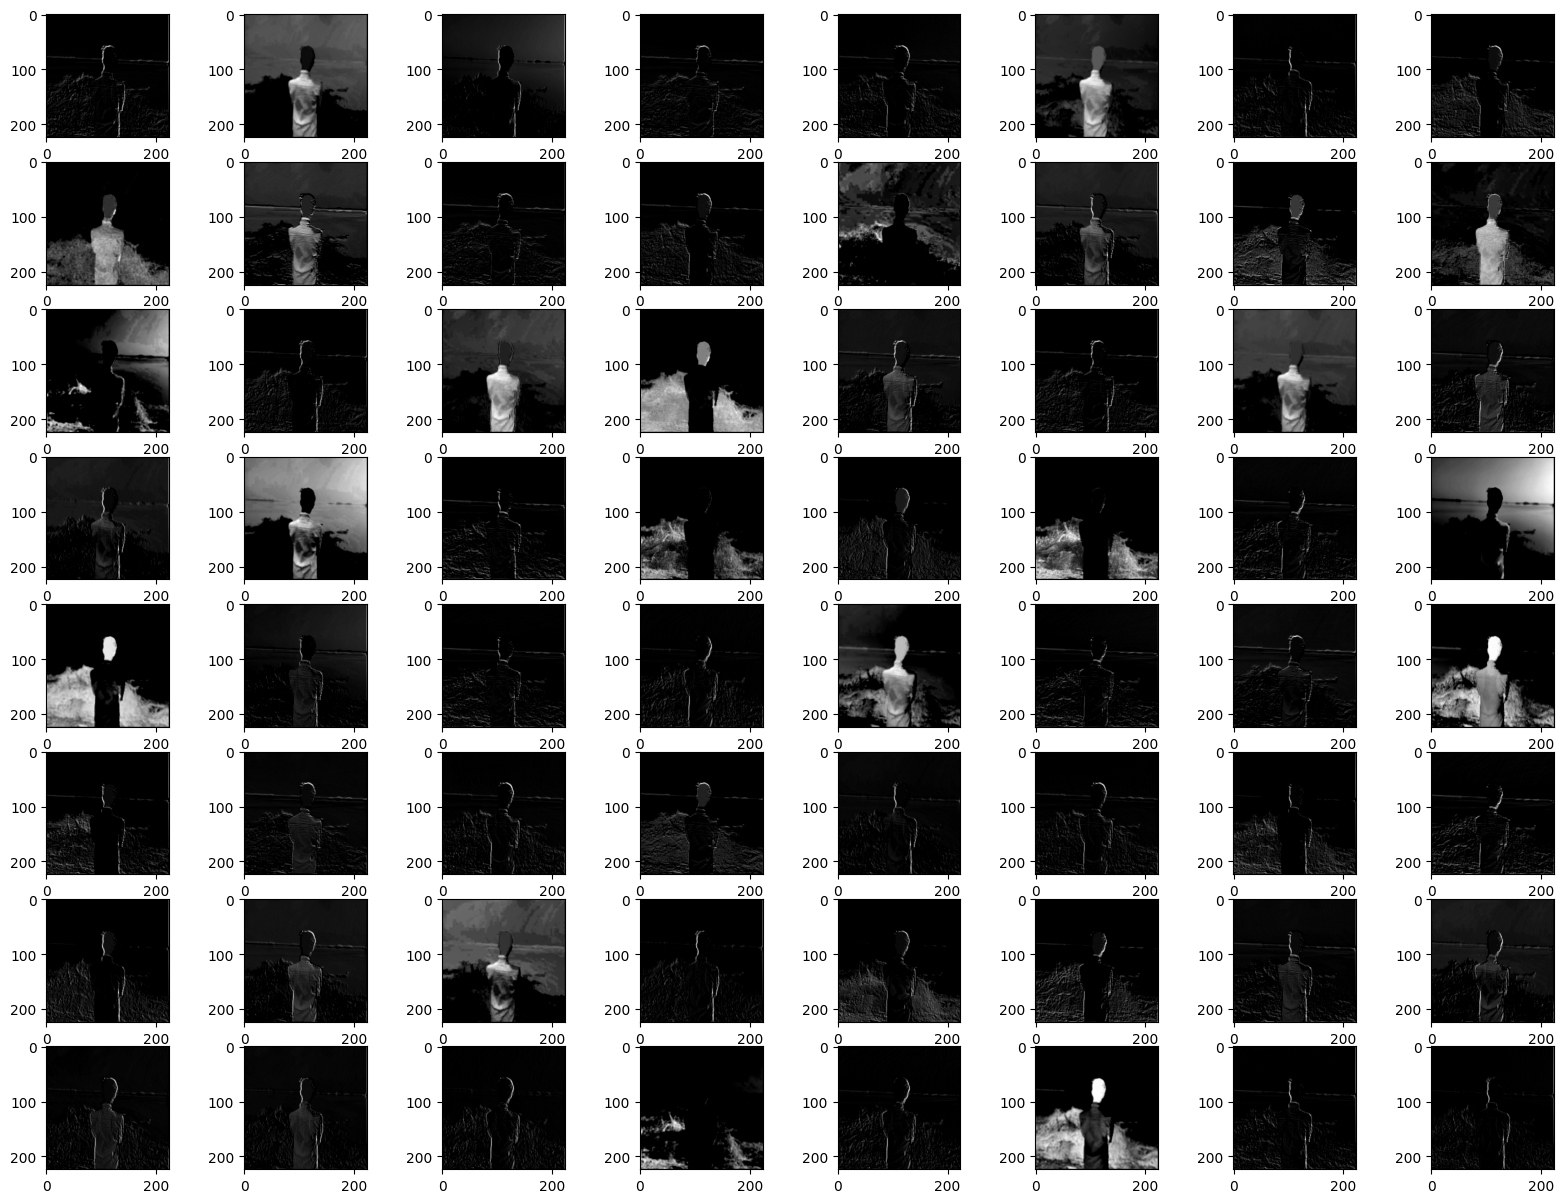

In [60]:
features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
  plt.subplot(8,8,i)
  plt.imshow(features[0,:,:,i-1],cmap='gray')
plt.show()

In [61]:
model2 = VGG16()

In [65]:
layer_index = [2 , 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model(inputs=model2.inputs,outputs=outputs)

In [66]:
feature_map = model3.predict(image)

1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 25ms/step


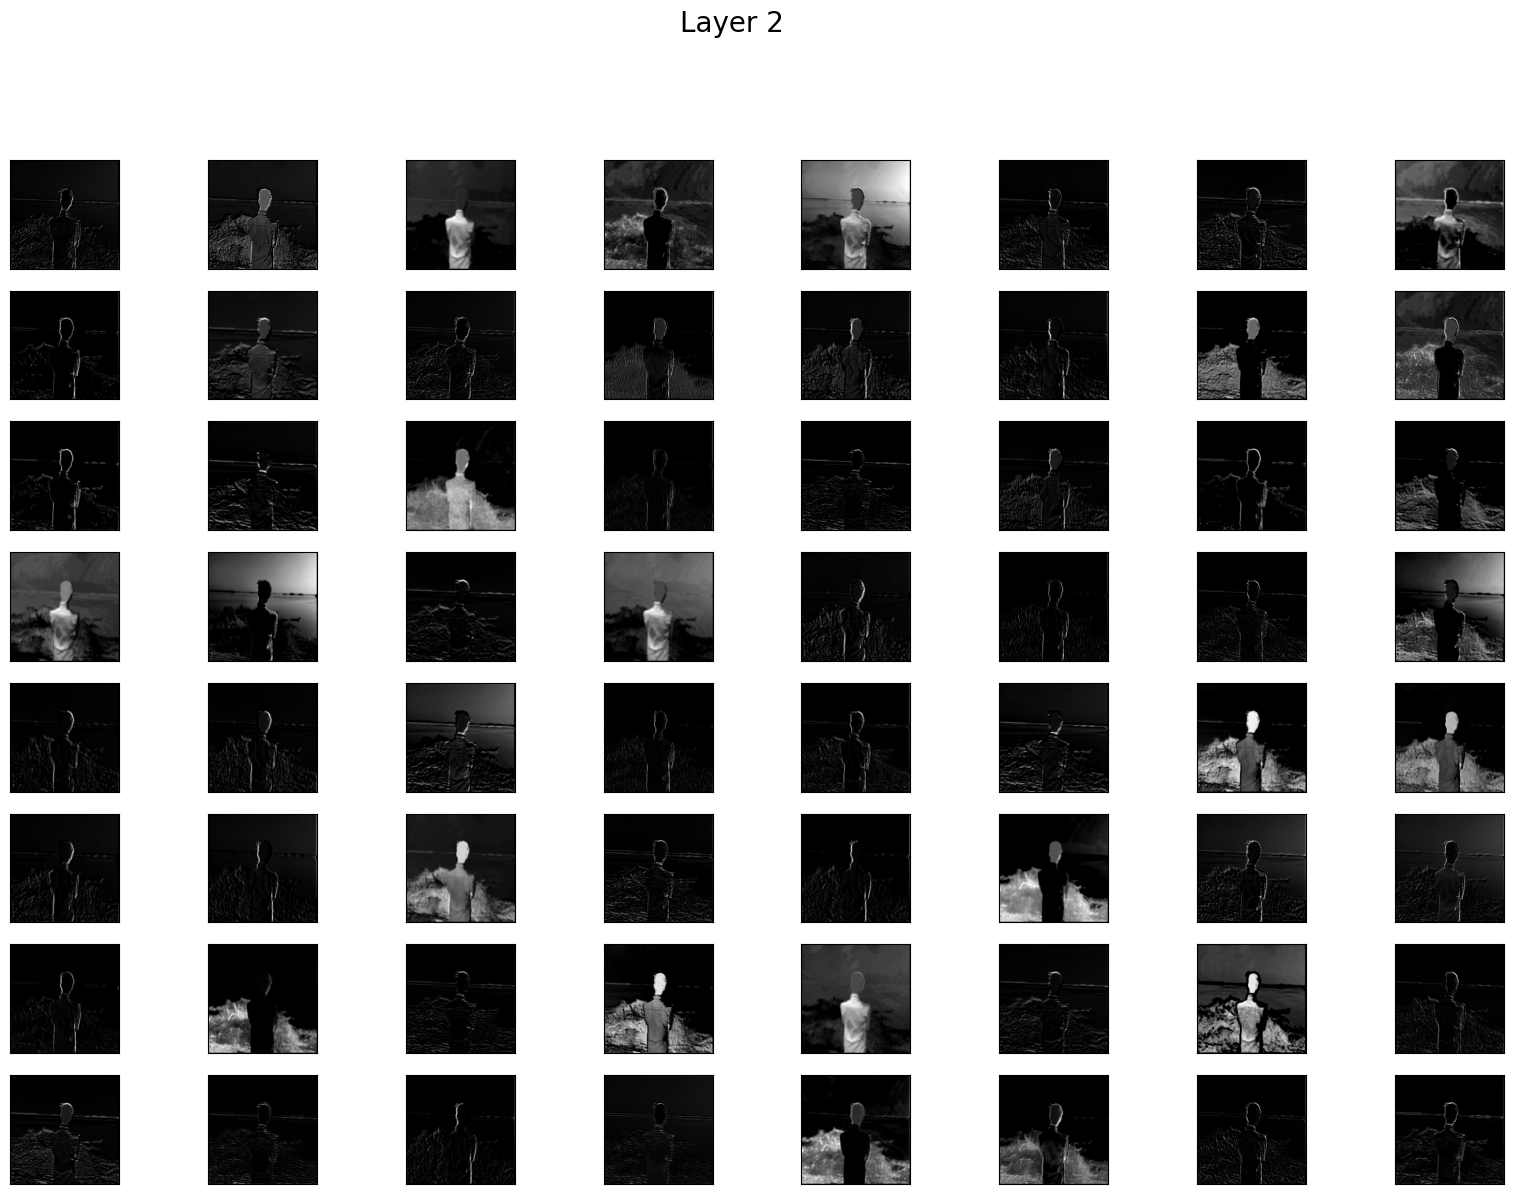

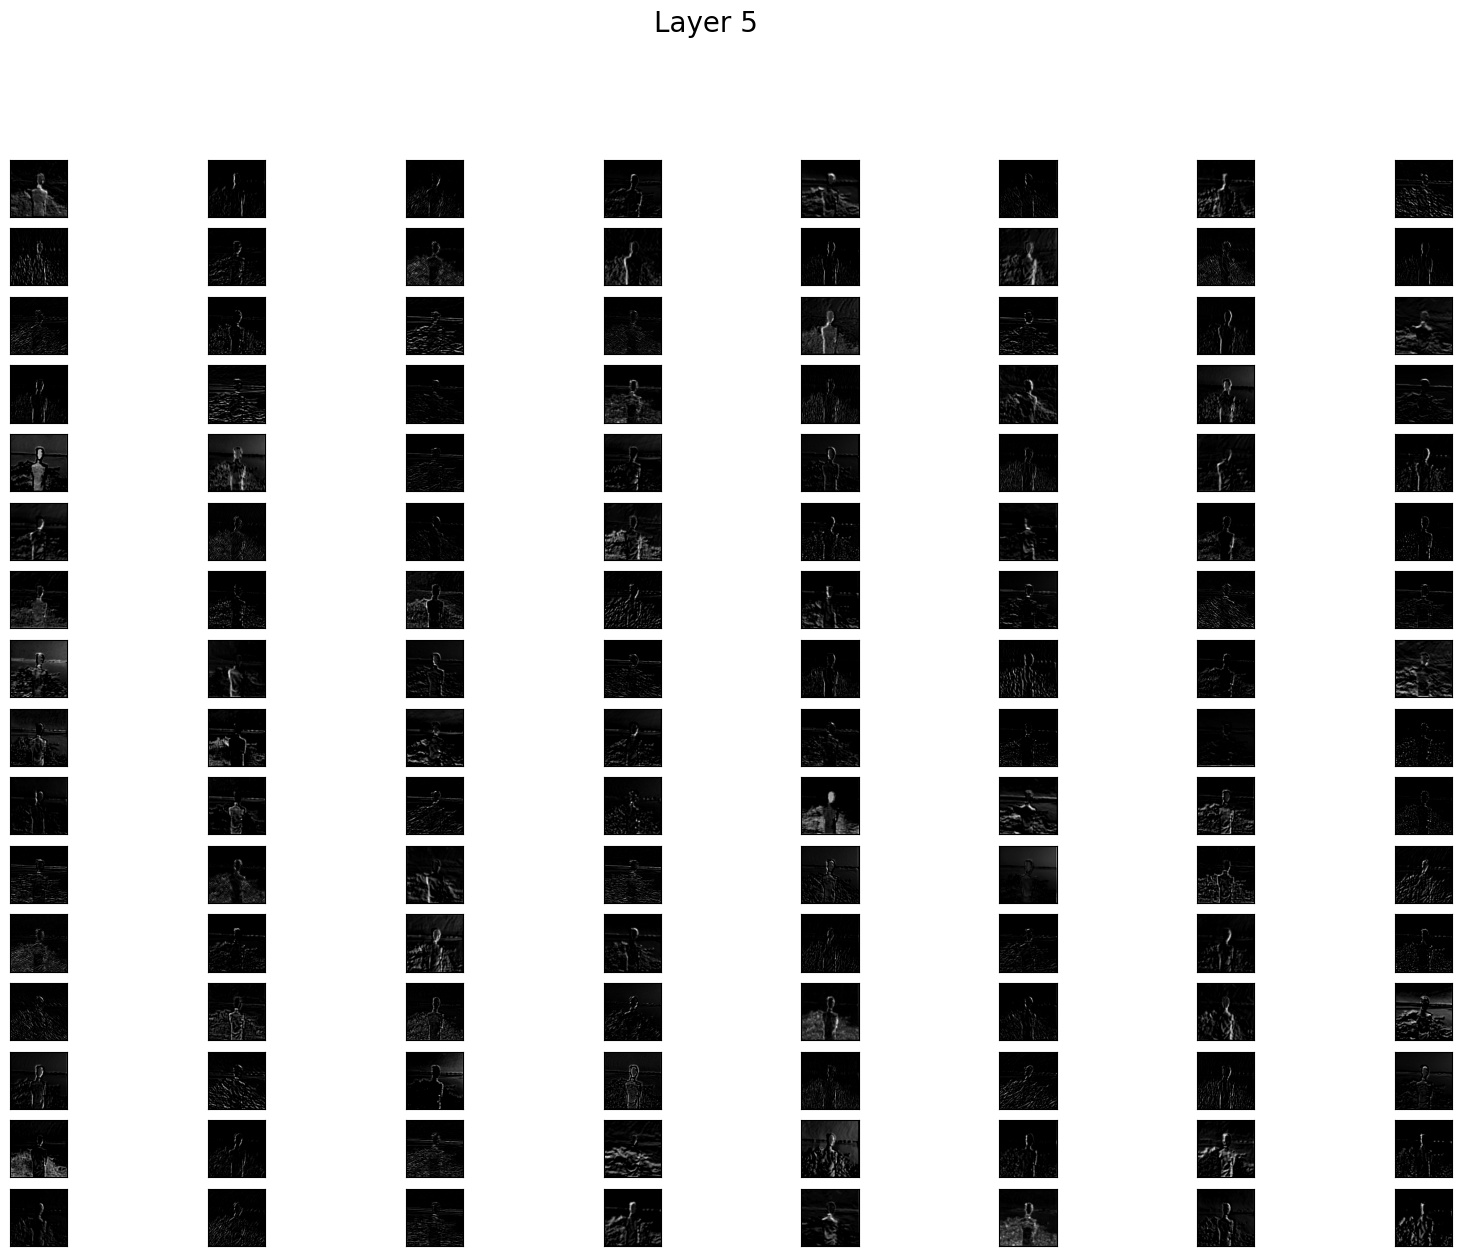

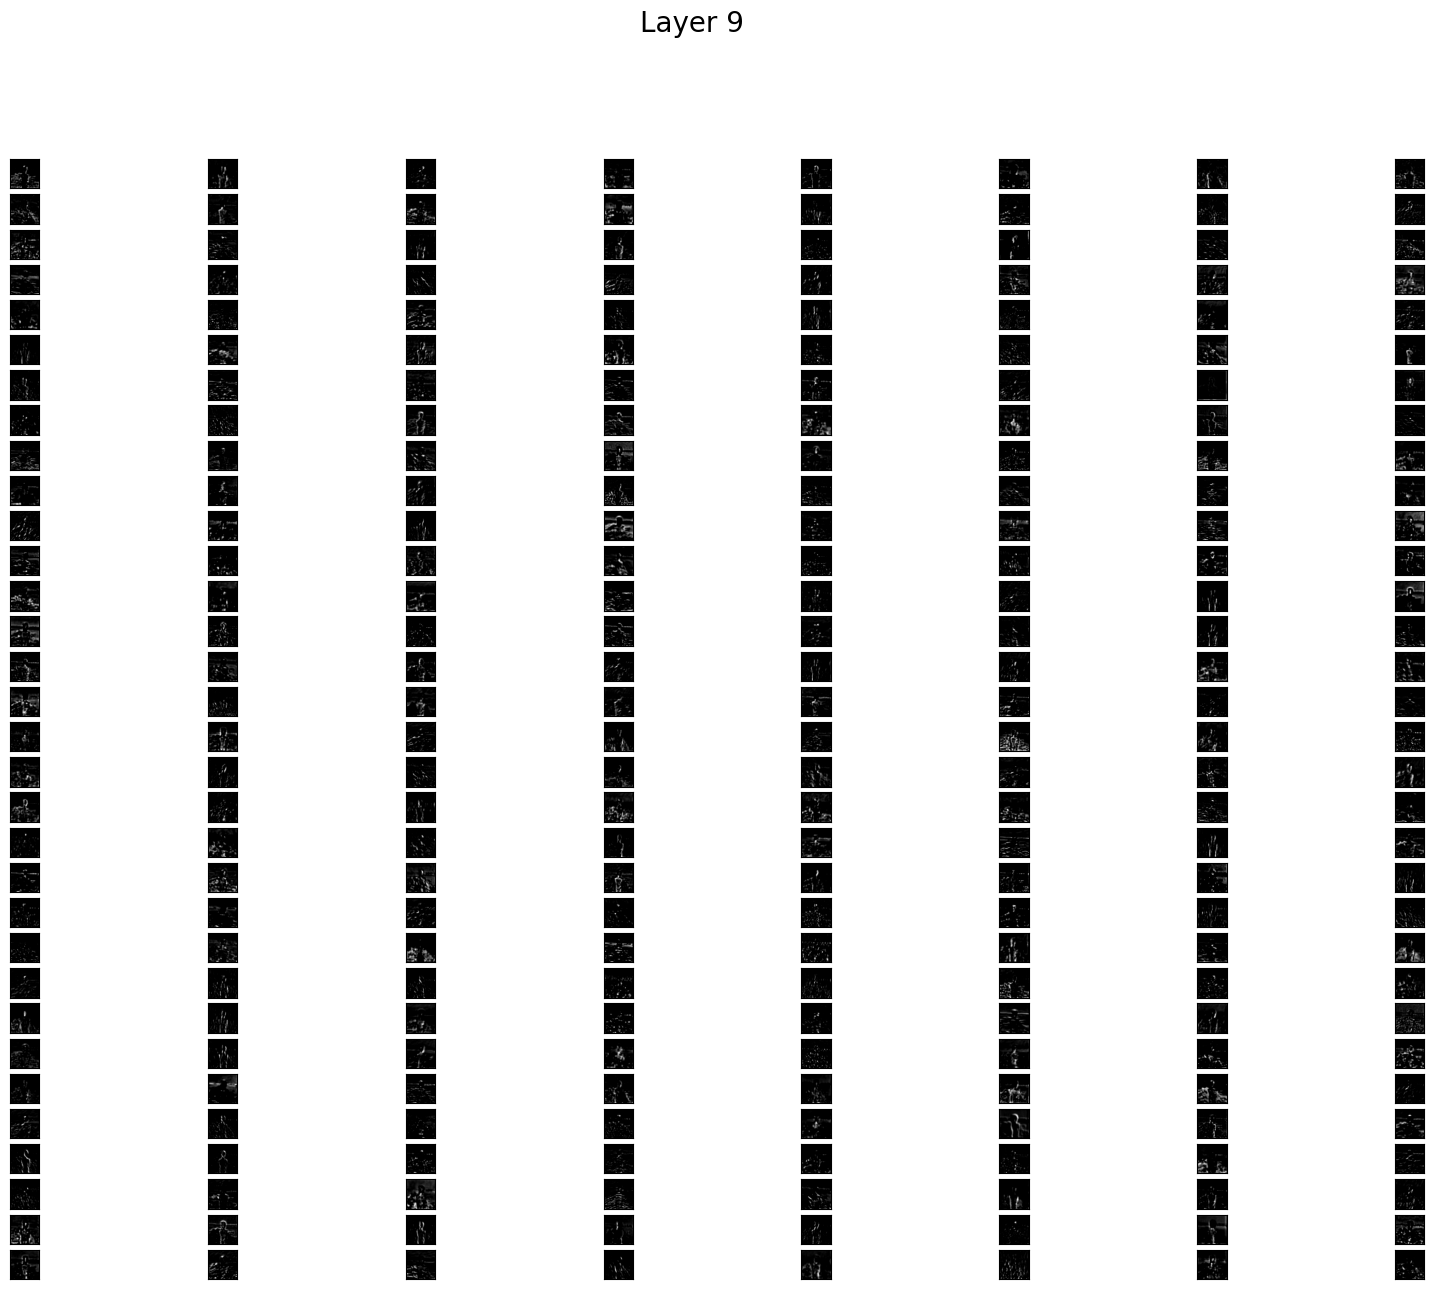

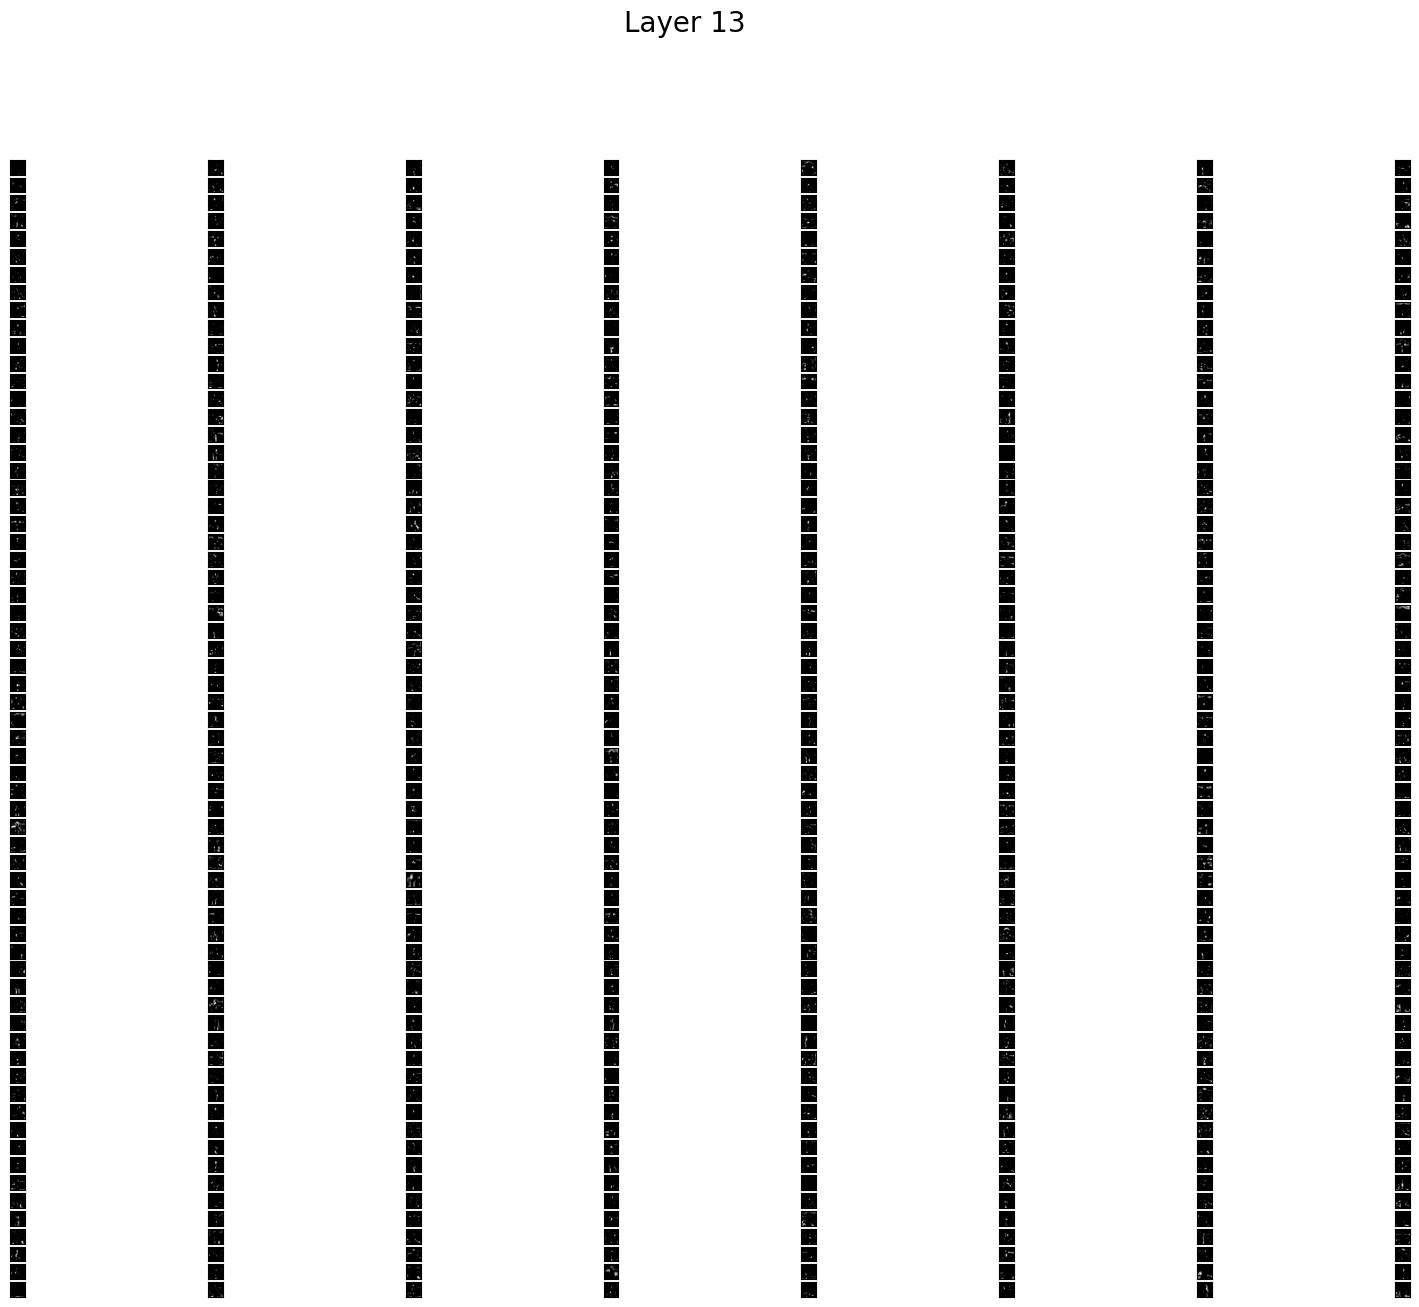

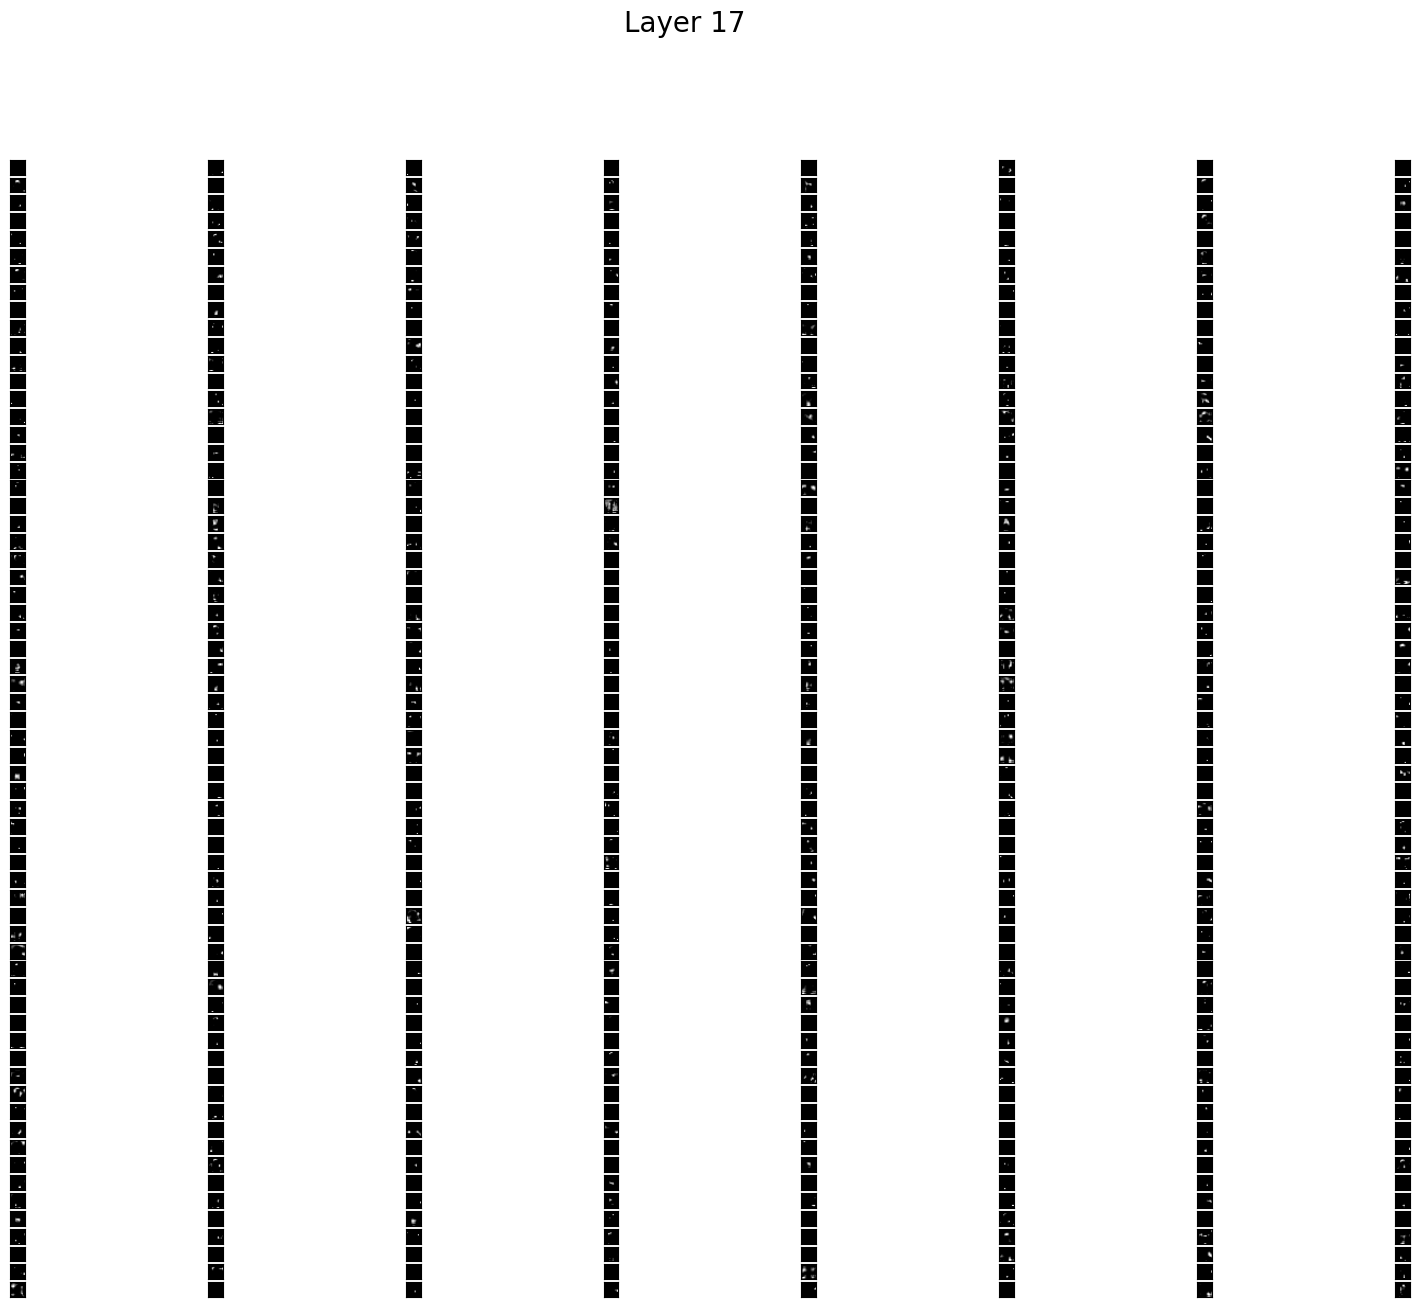

In [69]:
feature_maps = model3.predict(image)
maps_per_row = 8

for i, fmap in zip(layer_index, feature_maps):
    num_features = fmap.shape[-1]
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f"Layer {i}", fontsize=20)

    for j in range(1, num_features + 1):
        ax = plt.subplot(num_features // maps_per_row + 1, maps_per_row, j)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(fmap[0, :, :, j - 1], cmap='gray')

    plt.show()